In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_excel("sales_data.xlsx")
df.head()

,CustomerID,TOTAL_ORDERS,REVENUE,AVERAGE_ORDER_VALUE,CARRIAGE_REVENUE,AVERAGESHIPPING,FIRST_ORDER_DATE,LATEST_ORDER_DATE,AVGDAYSBETWEENORDERS,DAYSSINCELASTORDER,...,WEEK3_DAY16_DAY23_REVENUE,WEEK4_DAY24_DAY31_REVENUE,TIME_0000_0600_ORDERS,TIME_0601_1200_ORDERS,TIME_1200_1800_ORDERS,TIME_1801_2359_ORDERS,TIME_0000_0600_REVENUE,TIME_0601_1200_REVENUE,TIME_1200_1800_REVENUE,TIME_1801_2359_REVENUE
0,22,124,11986.54,96.67,529.59,4.27,2016-12-30,2021-10-24,14.19,1,...,2592.18,2409.71,12,61,37,14,1067.92,5674.65,3916.53,1327.44
1,29,82,11025.96,134.46,97.92,1.19,2018-03-31,2021-10-24,15.89,1,...,2807.66,4106.19,1,13,24,44,30.25,3143.69,2205.47,5646.55
2,83,43,7259.69,168.83,171.69,3.99,2017-11-30,2021-10-24,33.12,1,...,713.94,2861.90,0,6,12,25,0.00,707.98,2560.91,3990.80
3,95,44,6992.27,158.92,92.82,2.11,2019-04-09,2021-10-24,21.11,1,...,997.02,1260.08,0,10,13,21,0.00,1908.99,2025.05,3058.23
4,124,55,6263.44,113.88,179.04,3.26,2020-10-23,2021-10-24,6.65,1,...,2725.66,768.46,6,9,27,13,501.34,1197.83,3004.77,1559.50


In [3]:
df.shape

(5000, 40)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 40 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   CustomerID                 5000 non-null   int64         
 1   TOTAL_ORDERS               5000 non-null   int64         
 2   REVENUE                    5000 non-null   float64       
 3   AVERAGE_ORDER_VALUE        5000 non-null   float64       
 4   CARRIAGE_REVENUE           5000 non-null   float64       
 5   AVERAGESHIPPING            5000 non-null   float64       
 6   FIRST_ORDER_DATE           5000 non-null   datetime64[ns]
 7   LATEST_ORDER_DATE          5000 non-null   datetime64[ns]
 8   AVGDAYSBETWEENORDERS       5000 non-null   float64       
 9   DAYSSINCELASTORDER         5000 non-null   int64         
 10  MONDAY_ORDERS              5000 non-null   int64         
 11  TUESDAY_ORDERS             5000 non-null   int64         
 12  WEDNES

In [5]:
df.isna().sum()

CustomerID                   0
TOTAL_ORDERS                 0
REVENUE                      0
AVERAGE_ORDER_VALUE          0
CARRIAGE_REVENUE             0
AVERAGESHIPPING              0
FIRST_ORDER_DATE             0
LATEST_ORDER_DATE            0
AVGDAYSBETWEENORDERS         0
DAYSSINCELASTORDER           0
MONDAY_ORDERS                0
TUESDAY_ORDERS               0
WEDNESDAY_ORDERS             0
THURSDAY_ORDERS              0
FRIDAY_ORDERS                0
SATURDAY_ORDERS              0
SUNDAY_ORDERS                0
MONDAY_REVENUE               0
TUESDAY_REVENUE              0
WEDNESDAY_REVENUE            0
THURSDAY_REVENUE             0
FRIDAY_REVENUE               0
SATURDAY_REVENUE             0
SUNDAY_REVENUE               0
WEEK1_DAY01_DAY07_ORDERS     0
WEEK2_DAY08_DAY15_ORDERS     0
WEEK3_DAY16_DAY23_ORDERS     0
WEEK4_DAY24_DAY31_ORDERS     0
WEEK1_DAY01_DAY07_REVENUE    0
WEEK2_DAY08_DAY15_REVENUE    0
WEEK3_DAY16_DAY23_REVENUE    0
WEEK4_DAY24_DAY31_REVENUE    0
TIME_000

## Recency

In [6]:
lastpurchase_day = df[['CustomerID','DAYSSINCELASTORDER']].groupby('CustomerID').min().reset_index()
lastpurchase_day.rename(columns={'DAYSSINCELASTORDER':'Recency'}, inplace=True)

In [7]:
lastpurchase_day.head()

,CustomerID,Recency
0,1,53
1,2,94
2,3,53
3,4,5
4,5,130


## Frequency

In [8]:
orders = df[['CustomerID', 'TOTAL_ORDERS']].groupby('CustomerID').min().reset_index()
orders.rename(columns = {'TOTAL_ORDERS': 'Frequency'}, inplace=True)

In [9]:
orders.head()

,CustomerID,Frequency
0,1,61
1,2,59
2,3,53
3,4,84
4,5,26


## Monetary

In [10]:
revenue = df[['CustomerID', 'REVENUE']].groupby('CustomerID').min().reset_index()
revenue.rename(columns = {'REVENUE': 'Monetary'}, inplace = True)

In [11]:
revenue.head()

,CustomerID,Monetary
0,1,34847.40
1,2,32486.98
2,3,24178.97
3,4,18554.49
4,5,16884.99


In [12]:
m1 = pd.merge(lastpurchase_day,orders, on='CustomerID')
m1.head()

,CustomerID,Recency,Frequency
0,1,53,61
1,2,94,59
2,3,53,53
3,4,5,84
4,5,130,26


In [13]:
rfm = pd.merge(m1,revenue, on='CustomerID')
rfm.head()

,CustomerID,Recency,Frequency,Monetary
0,1,53,61,34847.40
1,2,94,59,32486.98
2,3,53,53,24178.97
3,4,5,84,18554.49
4,5,130,26,16884.99


# RFM Score

In [14]:
###Calculating quantile values
quintiles = rfm[['Recency', 'Frequency', 'Monetary']].quantile([.2, .25, .3, .35, .4, .5, .6, .7, .8, .9]).to_dict()
###Benchmark to give score for recency indicator
def r_score(r):
    if r < quintiles['Recency'][.2]:
        return 3 
    elif r < quintiles['Recency'][.8]:
        return 2
    else: 
        return 1
###Benchmark to give score for frequency & monetary indicator.   
def fm_score(f): 
    if f > quintiles['Frequency'][.8]:
        return 3
    elif f > quintiles['Frequency'][.2]: 
        return 2
    else: 
        return 1

In [15]:
# applying the above rule to data frame

In [16]:
rfm2 = rfm.copy()
rfm2['r_score'] = rfm2.Recency.apply(lambda x: r_score(x))
rfm2['f_score'] = rfm2.Frequency.apply(lambda x: fm_score(x))
rfm2['m_score'] = rfm2.Monetary.apply(lambda x: fm_score(x))
rfm2['rfm'] = rfm2['r_score'].map(str)+rfm2['f_score'].map(str) + rfm2['m_score'].map(str)

In [17]:
rfm2.head()

,CustomerID,Recency,Frequency,Monetary,r_score,f_score,m_score,rfm
0,1,53,61,34847.40,2,3,3,233
1,2,94,59,32486.98,2,3,3,233
2,3,53,53,24178.97,2,3,3,233
3,4,5,84,18554.49,2,3,3,233
4,5,130,26,16884.99,2,3,3,233


In [18]:
rfm2.to_csv("RFM_Score.csv")

# RFM Clustering

In [19]:
rfm2['rfm'].value_counts().sort_index(ascending=False)

233     901
223    2349
213     749
133       3
123     312
113     686
Name: rfm, dtype: int64

In [20]:
rfm2['rfm'].max()

'233'

In [21]:
###Loyal Customers, who are the champions of all the customers with highest score of RFM. 
rfm2_group1 = rfm2[rfm2['rfm']=='233']
rfm2_group1['label'] = 'champion'


In [22]:
rfm2_group1.head()

,CustomerID,Recency,Frequency,Monetary,r_score,f_score,m_score,rfm,label
0,1,53,61,34847.40,2,3,3,233,champion
1,2,94,59,32486.98,2,3,3,233,champion
2,3,53,53,24178.97,2,3,3,233,champion
3,4,5,84,18554.49,2,3,3,233,champion
4,5,130,26,16884.99,2,3,3,233,champion


In [23]:
print('Total number of champion customers : ', rfm2_group1['label'].count())

Total number of champion customers :  901


In [24]:
###Customers who have the most potential to become the Champions. They recently buy the products and they make their purchases quite frequently. Moreover, the amount they spent is quite great. 
rfm2_group2 = rfm2[rfm2['rfm'].str.contains('223|213')] 
rfm2_group2['label'] = 'potential'

In [25]:
rfm2_group2.head()

,CustomerID,Recency,Frequency,Monetary,r_score,f_score,m_score,rfm,label
7,8,62,19,15840.36,2,2,3,223,potential
17,18,93,10,12940.00,2,2,3,223,potential
31,32,87,10,10242.00,2,2,3,223,potential
60,61,87,18,8261.65,2,2,3,223,potential
62,63,6,18,8163.52,2,2,3,223,potential


In [26]:
print('Total number of potential customers : ', rfm2_group2['label'].count())

Total number of potential customers :  3098


In [27]:
# Customers who need attention
rfm2_group3 = rfm2[rfm2['rfm'].str.contains('133|123|113')] 
rfm2_group3['label'] = 'need attention'
rfm2_group3.head()

,CustomerID,Recency,Frequency,Monetary,r_score,f_score,m_score,rfm,label
1203,1534,207,16,2576.87,1,2,3,123,need attention
1247,1681,207,14,2495.51,1,2,3,123,need attention
1338,1971,207,14,2346.88,1,2,3,123,need attention
1345,1991,207,25,2335.18,1,3,3,133,need attention
1594,2928,207,11,1981.59,1,2,3,123,need attention


In [28]:
print('Total number of customers who need attention : ', rfm2_group3['label'].count())

Total number of customers who need attention :  1001


In [29]:
labels_count = [rfm2_group1['label'].count(),rfm2_group2['label'].count(),rfm2_group3['label'].count() ]
labels_count

[901, 3098, 1001]

In [30]:
labels = ['champion','potential', 'need attention']
labels

['champion', 'potential', 'need attention']

In [31]:
data={'Labels':labels,'Count':labels_count}
data


{'Labels': ['champion', 'potential', 'need attention'],
 'Count': [901, 3098, 1001]}

In [32]:
df1 = pd.DataFrame(data)
df1

,Labels,Count
0,champion,901
1,potential,3098
2,need attention,1001


<AxesSubplot:>

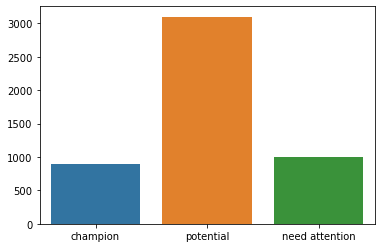

In [33]:
plt.rcParams['figure.figsize'] = (6,4)
sns.barplot(x=data['Labels'], y=data['Count'])